In [1]:
import numpy as np

### Loss and Cost Functions

In [2]:
def loss(y, yhat):
    yloss = -1 * (((1-y) * np.log(1-yhat)) + (y * np.log(yhat)))
    return yloss   

def cost(Y, Yhat):
    Jcost = np.sum(loss(Y, Yhat))/Y.shape[0]
    return Jcost

### Activation Functions

In [3]:
def unit_activation(yhat):    
    return yhat
unit_activation = np.vectorize(unit_activation)

def sigmoid_activation(yhat):    
    return 1/(1+np.exp(-yhat))
sigmoid_activation = np.vectorize(sigmoid_activation)

def relu_activation(yhat):    
    return yhat * (yhat > 0)
relu_activation = np.vectorize(relu_activation)

def relu_activation_deriv(yhat):    
    return np.sign(np.maximum(0,yhat))
relu_activation_deriv = np.vectorize(relu_activation_deriv)

### Create Matrices for Train and Test Data

In [4]:
X = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[0:320,0:2].T 
Y = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[0:320,2:3].T 

Xt = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[320:400,0:2].T 
Yt = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[320:400,2:3].T 
Yb = np.genfromtxt('pattern_rand.csv',delimiter=',', skip_header=True)[:,2:3].T 
    
n = X.shape[0]
m = X.shape[1]
t = Xt.shape[1]

print("Number of Features: ", n)
print("Number of Training Examples: ", m)
print("Number of Test Examples: ", t)

Number of Features:  2
Number of Training Examples:  320
Number of Test Examples:  80


### Initialization and Running Forward Propagation 

In [5]:
#Iterations
h = 1000
alpha = 0.05
# Initialization of J and Yhat
J = np.zeros((1,h))

In [6]:
# IL0: Number of inputs to Layer 0
# NL0: Number of neurons in Layer 0
IL0 = n
NL0 = n
# The first layer is input layer so both number of inputs 
# and number of neurons are equal to number of features

# IL1: Number of inputs to Layer 1
# NL1: Number of neurons in Layer 1
IL1 = NL0
NL1 = 4
# As there are n neurons in the previous layer, the number
# of inputs to Layer 1 is equal to n. Number of neurons
# may be any. 

# IL2: Number of inputs to Layer 2
# NL2: Number of neurons in Layer 2
IL2 = NL1
NL2 = 1
# Number of inputs in Layer 2 equals to number of neurons in
# the previous layer (one input coming from each neuron). As 
# this is binary classification with a single output, the number 
# of neurons equals 1. 


# Layer 0 is input layer so W0 is identity matrix while B0 is zero matrix.
# Layer 0 in a way simply reproduces its inputs at the output
B0 = np.zeros((NL0, 1))
W0 = np.identity((NL0))

# Layer 1 is a passthrough layer. As number of inputs to the layer equals
# 2 and number of neurons are 4, the size of W1 will be 4 x2. To make this
# layer a passthrough layer, the 4 x 2 W1 matrix needs to consist of a 
# a 2 x 2 identity matrix and a 2 x 2 zero matrix. Also B1 is a zero matrix
B1 = np.zeros((NL1,1))
W1 = np.array([[1, 0],[0, 1],[0, 0],[0, 0]])


# Layer 2 is a simple Logistic Regression Unit. W2 and B2 are intialized as ones.
B2 = np.ones((NL2,1))
W2 = np.ones((NL2,IL2))

cost_sample = []

# We now runs a loop for performing forward- and backpropagation
for g in range(h):
    # Forward propagation 
    X0 = X
    G0 = np.matmul(W0,X0) + B0
    H0 = unit_activation(G0)
    X1 = H0
    G1 = np.matmul(W1,X1) + B1
    H1 = relu_activation(G1)
    X2 = G1
    G2 = np.matmul(W2,X2) + B2
    H2 = sigmoid_activation(G2)
    Yhat = H2

    # Determine Cost
    J[0,g] = cost(Y, Yhat)/m
    
    if (g % 100 == 0):
        cost_sample.append(J[0,g])
    
    # Backpropagation Layer 2
    dJdG2 = Yhat - Y
    dJdB2 =  np.sum(dJdG2, axis=1,keepdims=True)/m 
    dJdW2 = np.matmul(dJdG2, X2.T)/m
    B2 = B2 - alpha * dJdB2
    W2 = W2 - alpha * dJdW2
    
    # Backpropagation Layer 1
    dG1dW1 = np.matmul(W2.T, dJdG2) * relu_activation_deriv(G1)
    dJdW1 = np.matmul(dG1dW1, X1.T)/m
    dJdB1 = np.matmul(dG1dW1, np.ones((m,1)))/m
    B1 = B1 - alpha * dJdB1
    W1 = W1 - alpha * dJdW1
    
X0 = X
G0 = np.matmul(W0,X0) + B0
H0 = unit_activation(G0)
X1 = H0
G1 = np.matmul(W1,X1) + B1
H1 = relu_activation(G1)
X2 = G1
Yhat = np.dot(W2,X2) + B2   
Yhat = sigmoid_activation(Yhat)
J[0,g] = np.sum(loss(Y, Yhat))/m
print("Jcost = {}".format(J[0,h-1]))
print("B2 = {}".format(B2))
print("W2 = ", W2)
print("B1 = {}".format(B1))
print("W1 = ", W1)
print("cost_sample = ",cost_sample)

Jcost = 0.6649768117834663
B2 = [[-0.18887031]]
W2 =  [[0.72019485 0.4670301  1.         1.        ]]
B1 = [[ 0.6834331 ]
 [-0.63324905]
 [ 0.        ]
 [ 0.        ]]
W1 =  [[ 0.51406801 -0.56166798]
 [-0.53949598  0.42692925]
 [ 0.          0.        ]
 [ 0.          0.        ]]
cost_sample =  [1.5921388658356355, 0.6958216831935922, 0.6728987955435611, 0.6663022591112616, 0.665614206021298, 0.6662008896739277, 0.6659382461958542, 0.6658941601332252, 0.6656228752472518, 0.6652592266207706]


### Plotting Cost Function

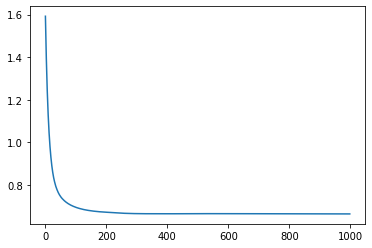

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(J[0, 0:h-1])
plt.show()

In [8]:
#Forward propagation (Test data)
X0 = Xt
G0 = np.matmul(W0,X0) + B0
H0 = unit_activation(G0)
X1 = H0
G1 = np.matmul(W1,X1) + B1
H1 = relu_activation(G1)
X2 = G1
G2 = np.matmul(W2,X2) + B2
H2 = sigmoid_activation(G2)
Ythat = H2

Ythis = []

for i in range(Xt.shape[1]):
    if Ythat[0,i] >= 0.5:
        Ythis.append(1.0)
    else:
        Ythis.append(0.0)
Ythis = np.array(Ythis).T

In [9]:
total = Yt.shape[1]
error = np.sum(abs(Yt - Ythis))
print("Accuracy: {}%".format((total-error)*100/total))

Accuracy: 47.5%
